In [37]:
import pandas as pd
import polars as pl
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import json
import numpy as np
from datetime import datetime
DATA_ROOT = '/media/gustavo/Storage/Datasets/Onion20k'
DATA_ROOT_URL=Path(DATA_ROOT)

# Filtering listening events of valid tracks

In [10]:
valid_tracks = pl.read_csv(DATA_ROOT_URL/'emotions_familiarity_full_feat.tsv',sep='\t')

In [11]:
listening_events = pl.scan_csv(DATA_ROOT_URL/'listening_history.csv',sep='\t').filter(pl.col('song').is_in(valid_tracks['id']))

In [13]:
listening_events.collect().write_csv(DATA_ROOT_URL/'listening_history_filtered.csv')

# Selecting contemporary tracks

In [27]:
listening_events = pd.read_csv(DATA_ROOT_URL/'listening_history_filtered.csv')


In [29]:
listening_events.loc[:,'timestamp']=pd.to_datetime(listening_events.loc[:,'timestamp'])

In [34]:
listening_events.describe()

/tmp/ipykernel_3170555/507446986.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  listening_events.describe()


,user,song,timestamp
count,890047,890047,890047
unique,14000,16324,115529
top,user_j7FaqBPq,Pf7CTDMAqnLhbcY2,2019-03-03 01:46:00
freq,500,22725,68
first,NaN,NaN,2013-12-30 22:46:00
last,NaN,NaN,2019-03-26 11:24:00


In [76]:
valid_tracks = pd.read_csv(DATA_ROOT_URL/'emotions_familiarity_full_feat.tsv',sep='\t')

<AxesSubplot:>

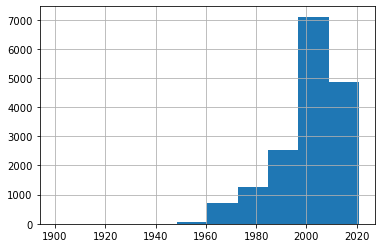

In [ ]:
valid_tracks['year'].hist()

In [79]:
LFM_DATA_FILE = Path(DATA_ROOT)/'music4all.json.bz2'
valid_tracks.query(f'date_prec in ["month","day"]')

,id,"(tag, weight)",gems,gems_profile,genre,microgenre,power,tenderness,transcendence,wonder,...,tension,nostalgia,sadness,peacefulness,date,date_prec,year,month,day,release_date
0,007LIJOPQ4Sb98qV,"{'post punk': 7, 'new wave': 40, 'british i li...",['tenderness'],{'tenderness': 1.0},rock,new wave,0.000000,1.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,2009-11-23,day,2009,11,23,2009-11-23
1,00CH4HJdxQQQbJfu,"{'experimental': 100, 'indie': 90, 'indie rock...",['transcendence'],{'transcendence': 1.0},rock,experimental,0.000000,0.0,1.000000,0.000000,...,0.0,0.000000,0.0,0.0,2009-10-19,day,2009,10,19,2009-10-19
2,00P2bHdWFkghmDqz,"{'soul': 100, 'british': 47, 'fip': 47, 'funk'...","['wonder', 'joyful activation']","{'wonder': 0.5, 'joyful activation': 0.5}",funk / soul,soul,0.000000,0.0,0.000000,0.500000,...,0.0,0.000000,0.0,0.0,2012-01-01,day,2012,1,1,2012-01-01
3,00hFmpewuNvc4dRL,"{'dance': 100, 'pop': 80, 'rock': 60, 'house':...",['joyful activation'],{'joyful activation': 1.0},electronic,house,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,2007-08-29,day,2007,8,29,2007-08-29
4,00mLjKFmaTv9MdaB,"{'dance': 100, 'hip hop': 72, 'pop': 80, 'rap'...","['wonder', 'power', 'joyful activation']","{'wonder': 0.03389830508474576, 'power': 0.025...",electronic,hip hop,0.025424,0.0,0.000000,0.033898,...,0.0,0.000000,0.0,0.0,2009-01-01,day,2009,1,1,2009-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16534,zzjzIS5AWk6uHtWX,"{'progressive rock': 100, 'rock': 34, 'melanch...","['transcendence', 'nostalgia']","{'transcendence': 0.25925925925925924, 'nostal...",rock,pop rock,0.000000,0.0,0.259259,0.000000,...,0.0,0.740741,0.0,0.0,2011-04-01,day,2011,4,1,2011-04-01
16535,zzm0WMJ14dzbttpm,"{'cover': 100, 'alternative rock': 63, 'rock':...","['transcendence', 'power']","{'transcendence': 0.5, 'power': 0.5}",rock,alternative rock,0.500000,0.0,0.500000,0.000000,...,0.0,0.000000,0.0,0.0,2003-03-24,day,2003,3,24,2003-03-24
16536,zzp2MNG0xjWs7NiN,"{'australian': 100, 'beautiful': 80, 'indie': ...","['nostalgia', 'peacefulness', 'power']","{'nostalgia': 0.2, 'peacefulness': 0.2, 'power...",rock,power pop,0.600000,0.0,0.000000,0.000000,...,0.0,0.200000,0.0,0.2,2017-07-05,day,2017,7,5,2017-07-05
16537,zzpkRCGA5ud8q4mv,"{'soul': 100, 'blues': 67, '60s': 50, 'cover':...",['nostalgia'],{'nostalgia': 1.0},funk / soul,soul,0.000000,0.0,0.000000,0.000000,...,0.0,1.000000,0.0,0.0,1965-09-15,day,1965,9,15,1965-09-15


(16540, 18)